
 #### User Story 5 : Classification supervisée et évaluation des modèles



**Définir la variable cible y à partir de la colonne Cluster**




In [132]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

df=pd.read_csv("../data/classified/data_cleabed_standardized_clustred_classified.csv")
print(df.head())
y = df["Cluster"]
print(y.head())


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.825781  0.866088      -0.029786       0.666679  0.570502  0.175717   
1    -0.802604 -1.202351      -0.526828      -0.001845 -1.363052 -0.855806   
2     1.152449  2.015220      -0.692509      -0.224686  0.476416 -1.342096   
3    -0.802604 -1.071021      -0.526828      -0.670369 -0.525808 -0.634765   
4    -1.703581  0.504932      -2.680676       0.666679  0.446709  1.575641   

   DiabetesPedigreeFunction       Age  Cluster  risk_category  
0                  0.612059  1.437767        0   risque_eleve  
1                 -0.324994 -0.050575        1  risque_faible  
2                  0.749586  0.047687        0   risque_eleve  
3                 -1.063014 -1.247065        1  risque_faible  
4                  4.158488  0.143015        0   risque_eleve  
0    0
1    1
2    0
3    1
4    0
Name: Cluster, dtype: int64


**Définir X à partir des variables sélectionnées**

In [133]:
X = df.drop(columns=["Cluster", "risk_category"])
print(X.head())


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.825781  0.866088      -0.029786       0.666679  0.570502  0.175717   
1    -0.802604 -1.202351      -0.526828      -0.001845 -1.363052 -0.855806   
2     1.152449  2.015220      -0.692509      -0.224686  0.476416 -1.342096   
3    -0.802604 -1.071021      -0.526828      -0.670369 -0.525808 -0.634765   
4    -1.703581  0.504932      -2.680676       0.666679  0.446709  1.575641   

   DiabetesPedigreeFunction       Age  
0                  0.612059  1.437767  
1                 -0.324994 -0.050575  
2                  0.749586  0.047687  
3                 -1.063014 -1.247065  
4                  4.158488  0.143015  


Random Forest - Accuracy moyenne: 0.949, Écart-type: 0.005
SVM - Accuracy moyenne: 0.971, Écart-type: 0.010
Logistic Regression - Accuracy moyenne: 0.990, Écart-type: 0.011


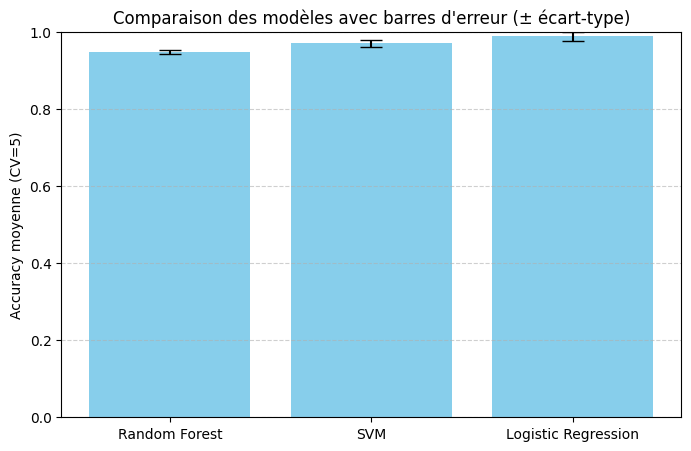

In [134]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# 🔹 Liste de modèles à comparer
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# 🔹 Stocker les résultats
mean_scores = []
std_scores = []
model_names = []

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    mean_scores.append(scores.mean())
    std_scores.append(scores.std())
    model_names.append(name)
    print(f"{name} - Accuracy moyenne: {scores.mean():.3f}, Écart-type: {scores.std():.3f}")

# 🔹 Tracé du graphe
plt.figure(figsize=(8,5))
plt.bar(model_names, mean_scores, yerr=std_scores, capsize=8, color='skyblue')
plt.ylabel("Accuracy moyenne (CV=5)")
plt.title("Comparaison des modèles avec barres d'erreur (± écart-type)")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Scores de chaque fold : [0.99350649 0.98701299 0.99350649 1.         1.        ]
Accuracy moyenne : 0.995
Écart-type : 0.005


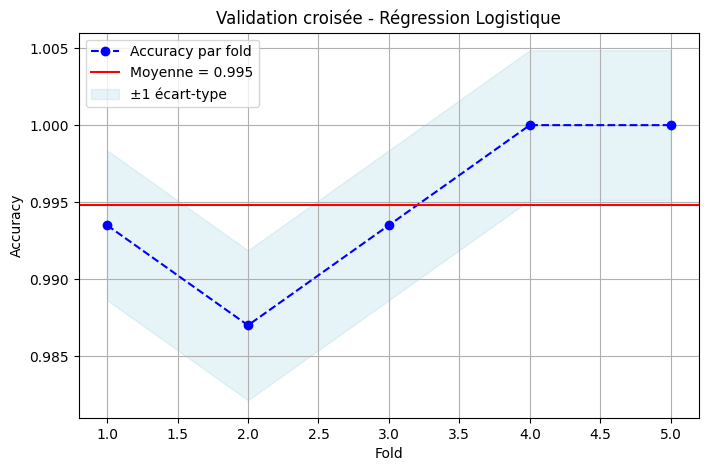

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Modèle
log_reg = LogisticRegression(C=10, solver='liblinear')

# Validation croisée sur 5 folds
scores = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')

# Résultats
print(f"Scores de chaque fold : {scores}")
print(f"Accuracy moyenne : {scores.mean():.3f}")
print(f"Écart-type : {scores.std():.3f}")

# Graphe
plt.figure(figsize=(8,5))
plt.plot(range(1,6), scores, marker='o', linestyle='--', color='blue', label='Accuracy par fold')
plt.axhline(y=scores.mean(), color='red', linestyle='-', label=f'Moyenne = {scores.mean():.3f}')
plt.fill_between(range(1,6),
                 scores - scores.std(),
                 scores + scores.std(),
                 color='lightblue', alpha=0.3, label='±1 écart-type')

plt.title("Validation croisée - Régression Logistique")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


**Diviser les données en ensemble d’entraînement et de test à l’aide de traintestsplit**


In [137]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

print("Répartition des classes dans le train :")
print(y_train.value_counts(normalize=True))
print("Forme du train :", X_train.shape)
print("Forme du test :", X_test.shape)
print(X_train)

Répartition des classes dans le train :
Cluster
0    0.542345
1    0.457655
Name: proportion, dtype: float64
Forme du train : (614, 8)
Forme du test : (154, 8)
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
744     1.726759  1.030249       1.295659       0.889521  0.140886  1.207240   
156    -0.275566 -0.742698      -1.686592      -1.561734 -0.525808 -1.150527   
420    -0.802604 -0.086051       1.295659       1.335203  0.466572  1.899834   
430    -0.275566 -0.742698      -1.023870      -1.068299 -0.263013 -1.504192   
539     0.098373  0.242273       1.627020       2.226569  0.311570  0.588326   
..           ...       ...            ...            ...       ...       ...   
245     1.289400  2.048052       1.047138      -1.561734  0.769212 -0.354781   
45     -1.703581  1.916723      -0.526828       1.112362  1.386422  1.413545   
529    -1.703581 -0.348709      -0.609668      -0.765872  0.159598 -1.150527   
393     0.388423 -0.184548      -0.02978

**Gérer le déséquilibre des classes avec des techniques de sur-échantillonnage ou sous-échantillonnage (RandomOverSampler, UnderSampler via imblearn)**


Le rapport est environ 417 / 351 ≈ 1.18,
donc les deux classes sont presque équilibrées.

En général, on parle de déséquilibre si une classe est au moins 2 à 3 fois plus fréquente que l’autre

**Tester les algorithmes suivants : Random Forest, SVM, Gradient Boosting, Decision Tree, Régression Logistique , XGB.**

In [138]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score, f1_score,recall_score
)
import joblib
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

# Prédictions sur le train et le test
y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

# Calcul des scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)

print(f"Accuracy Train : {train_acc:.3f}")
print(f"Accuracy Test  : {test_acc:.3f}")
acc = accuracy_score(y_test, y_pred)
f1_sc=f1_score(y_test,y_pred, average="weighted")
print(f" Accuracy : {acc:.3f}")
print(f" F1-score : {f1_sc:.3f}")
print(classification_report(y_test, y_pred))

joblib.dump(model, f"../models/{model}_final.pkl")


# models=["RandomForestClassifier","GradientBoostingClassifier","DecisionTreeClassifier","LogisticRegression","SVC","XGBClassifier"]



Accuracy Train : 1.000
Accuracy Test  : 0.955
 Accuracy : 0.955
 F1-score : 0.954
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        84
           1       0.97      0.93      0.95        70

    accuracy                           0.95       154
   macro avg       0.96      0.95      0.95       154
weighted avg       0.96      0.95      0.95       154



['../models/RandomForestClassifier()_final.pkl']

 Résultats pour Random Forest
→ Accuracy : 0.942
→ F1-score : 0.941
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        84
           1       0.96      0.91      0.93        70

    accuracy                           0.94       154
   macro avg       0.94      0.94      0.94       154
weighted avg       0.94      0.94      0.94       154



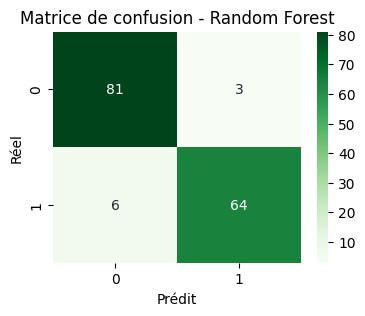

Random Forest: moyenne = 0.946, écart-type = 0.013
 Résultats pour Gradient Boosting
→ Accuracy : 0.948
→ F1-score : 0.948
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        84
           1       0.96      0.93      0.94        70

    accuracy                           0.95       154
   macro avg       0.95      0.95      0.95       154
weighted avg       0.95      0.95      0.95       154



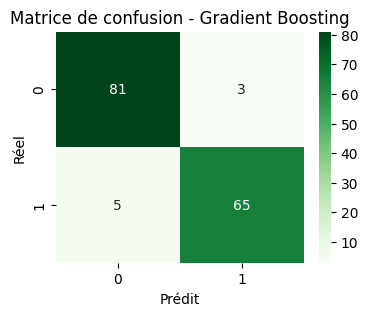

Gradient Boosting: moyenne = 0.943, écart-type = 0.016
 Résultats pour Logistic Regression
→ Accuracy : 1.000
→ F1-score : 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        70

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



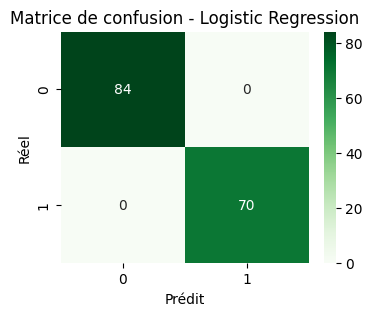

Logistic Regression: moyenne = 0.993, écart-type = 0.006
 Résultats pour Decision Tree
→ Accuracy : 0.896
→ F1-score : 0.896
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        84
           1       0.89      0.89      0.89        70

    accuracy                           0.90       154
   macro avg       0.90      0.90      0.90       154
weighted avg       0.90      0.90      0.90       154



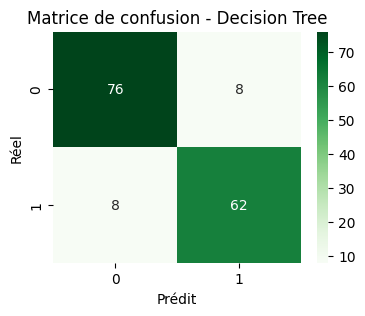

Decision Tree: moyenne = 0.870, écart-type = 0.013
 Résultats pour SVC
→ Accuracy : 0.961
→ F1-score : 0.961
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        84
           1       0.97      0.94      0.96        70

    accuracy                           0.96       154
   macro avg       0.96      0.96      0.96       154
weighted avg       0.96      0.96      0.96       154



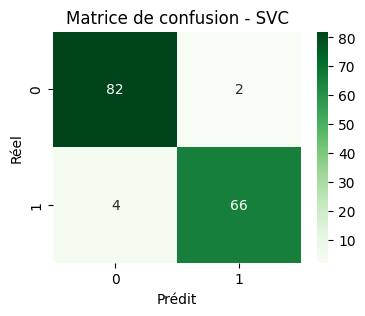

SVC: moyenne = 0.966, écart-type = 0.017
 Résultats pour XGBoost
→ Accuracy : 0.961
→ F1-score : 0.961
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        84
           1       0.97      0.94      0.96        70

    accuracy                           0.96       154
   macro avg       0.96      0.96      0.96       154
weighted avg       0.96      0.96      0.96       154



c:\Users\oussa\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:23:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


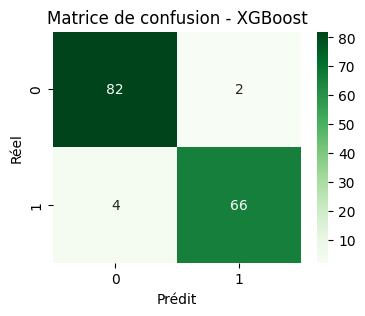

c:\Users\oussa\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:23:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\oussa\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:23:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\oussa\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:23:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\oussa\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:23:24] WARNING: C:\actio

XGBoost: moyenne = 0.932, écart-type = 0.021


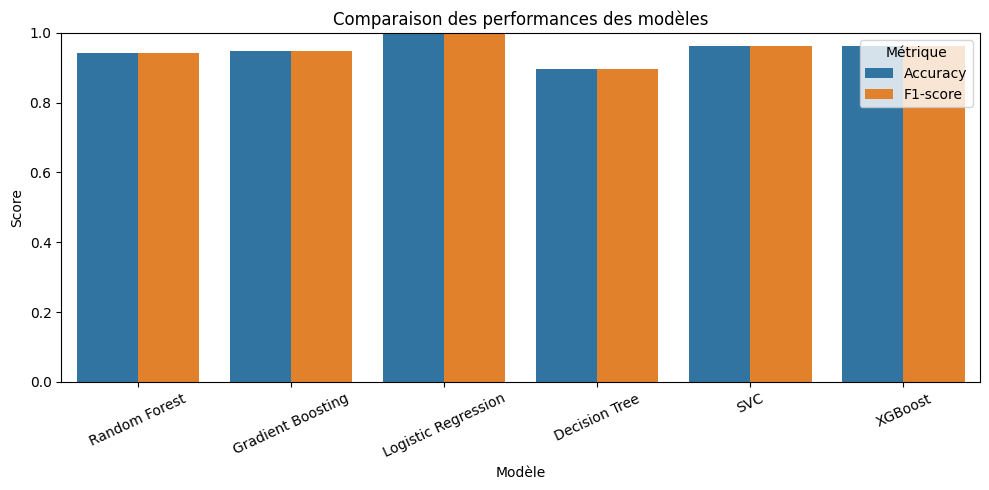

In [140]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
results=[]
def entrainer_models(model_class, X_train, X_test, y_train, y_test, model_name, **kwargs):
    model = model_class(**kwargs)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1_sc = f1_score(y_test, y_pred, average="weighted")

    print("="*60)
    print(f" Résultats pour {model_name}")
    print("="*60)

    print(f"→ Accuracy : {acc:.3f}")
    print(f"→ F1-score : {f1_sc:.3f}")
    print(classification_report(y_test, y_pred))

    results.append({
        "Modèle": model_name,
        "Accuracy": acc,
        "F1-score": f1_sc
    })
    print("="*60)

    plt.figure(figsize=(4,3))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
    plt.title(f"Matrice de confusion - {model_name}")
    plt.xlabel("Prédit")
    plt.ylabel("Réel")
    plt.show()
    print("="*60)

    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{model_name}: moyenne = {scores.mean():.3f}, écart-type = {scores.std():.3f}")

    return model



entrainer_models(RandomForestClassifier, X_train, X_test, y_train, y_test, "Random Forest",random_state=42)
entrainer_models(GradientBoostingClassifier, X_train, X_test, y_train, y_test, "Gradient Boosting",random_state=42)
entrainer_models(LogisticRegression, X_train, X_test, y_train, y_test, "Logistic Regression",max_iter=1000)
entrainer_models(DecisionTreeClassifier, X_train, X_test, y_train, y_test, "Decision Tree",random_state=42)
entrainer_models(SVC, X_train, X_test, y_train, y_test, "SVC", probability=True)
entrainer_models(XGBClassifier, X_train, X_test, y_train, y_test, "XGBoost", use_label_encoder=False, eval_metric='logloss')

print("="*60)

results_df = pd.DataFrame(results)
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df.melt(id_vars="Modèle", var_name="Métrique", value_name="Score"),
            x="Modèle", y="Score", hue="Métrique")
plt.title("Comparaison des performances des modèles")
plt.xticks(rotation=25)
plt.ylim(0, 1)
plt.legend(title="Métrique")
plt.tight_layout()
plt.show()
print("="*60)


**Utiliser des techniques comme GridSearchCV ou RandomizedSearchCV pour affiner les hyperparamètres des modèles et améliorer leurs performances**

In [141]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
import joblib

models_params = {
    "RandomForestClassifier": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 5, 10],
            "min_samples_split": [2, 5]
        }
    },
    "GradientBoostingClassifier": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "learning_rate": [0.05, 0.1],
            "max_depth": [3, 5]
        }
    },
    "DecisionTreeClassifier": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "max_depth": [None, 5, 10],
            "criterion": ["gini", "entropy"]
        }
    },
    "LogisticRegression": {
        "model": LogisticRegression(max_iter=1000, random_state=42),
        "params": {
            "C": [0.1, 1, 10],
            "solver": ["liblinear", "lbfgs"]
        }
    },
    "SVC": {
        "model": SVC(probability=True, random_state=42),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf"]
        }
    },
    "XGBClassifier": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [3, 5],
            "learning_rate": [0.05, 0.1]
        }
    }
}

best_models = {}

for name, mp in models_params.items():
    print(f"\n Recherche des meilleurs paramètres pour : {name}")
    grid = GridSearchCV(
        estimator=mp["model"],
        param_grid=mp["params"],
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_train, y_train)

    print(f" Meilleur score (accuracy) : {grid.best_score_:.3f}")
    print(f" Meilleurs paramètres : {grid.best_params_}")

    y_pred = grid.best_estimator_.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")

    print(f" Test Accuracy : {acc:.3f}")
    print(f"F1-score : {f1:.3f}")
    print(classification_report(y_test, y_pred))

    best_models[name] = {
        "best_model": grid.best_estimator_,
        "best_params": grid.best_params_,
        "cv_score": grid.best_score_,
        "test_accuracy": acc,
        "f1_score": f1
    }

results = pd.DataFrame([
    {
        "Modèle": name,
        "CV Accuracy": m["cv_score"],
        "Test Accuracy": m["test_accuracy"],
        "F1-score": m["f1_score"]
    } for name, m in best_models.items()
])

print("\n Comparaison finale des modèles :")
print(results.sort_values(by="Test Accuracy", ascending=False))



best_model_name = results.sort_values(by="Test Accuracy", ascending=False).iloc[0]["Modèle"]
final_model = best_models[best_model_name]["best_model"]

joblib.dump(final_model, f"../models/{best_model_name}_final.pkl")
print(f" Modèle sauvegardé : {best_model_name}_final.pkl")



 Recherche des meilleurs paramètres pour : RandomForestClassifier
Fitting 5 folds for each of 18 candidates, totalling 90 fits
 Meilleur score (accuracy) : 0.946
 Meilleurs paramètres : {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
 Test Accuracy : 0.942
F1-score : 0.941
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        84
           1       0.96      0.91      0.93        70

    accuracy                           0.94       154
   macro avg       0.94      0.94      0.94       154
weighted avg       0.94      0.94      0.94       154


 Recherche des meilleurs paramètres pour : GradientBoostingClassifier
Fitting 5 folds for each of 8 candidates, totalling 40 fits
 Meilleur score (accuracy) : 0.945
 Meilleurs paramètres : {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
 Test Accuracy : 0.955
F1-score : 0.955
              precision    recall  f1-score   support

           0       0.95      0.96  

c:\Users\oussa\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:24:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
